- Chat: https://chatgpt.com/share/6736edd3-6104-800e-8648-0ce4e4240d29
- Source data: http://td.winnerstudio.vip:8996/#/tga/ide/59_32514

C:\Users\Win11\AppData\Local\Temp\ipykernel_22640\1457421184.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_games_data['Treatment'] = top_games_data['nth_game'].apply(


,game,Treatment,day_7_net_amount_sum
0,102: com.asselin.android.fortunelegends,New user,382.405218
1,102: com.asselin.android.fortunelegends,Recycled user,287.162060
2,102: com.asselin.android.luckylegends,New user,39.136792
3,102: com.asselin.android.luckylegends,Recycled user,45.126049
4,102: com.prudentprophet.jackpotspinning777,New user,106.955124
5,102: com.prudentprophet.jackpotspinning777,Recycled user,141.600783
6,102: com.shrewdscholar.mirthvegas,New user,117.945674
7,102: com.shrewdscholar.mirthvegas,Recycled user,128.149601
8,59: com.reelsflight.newb,New user,70.789090
9,59: com.reelsflight.newb,Recycled user,73.442359


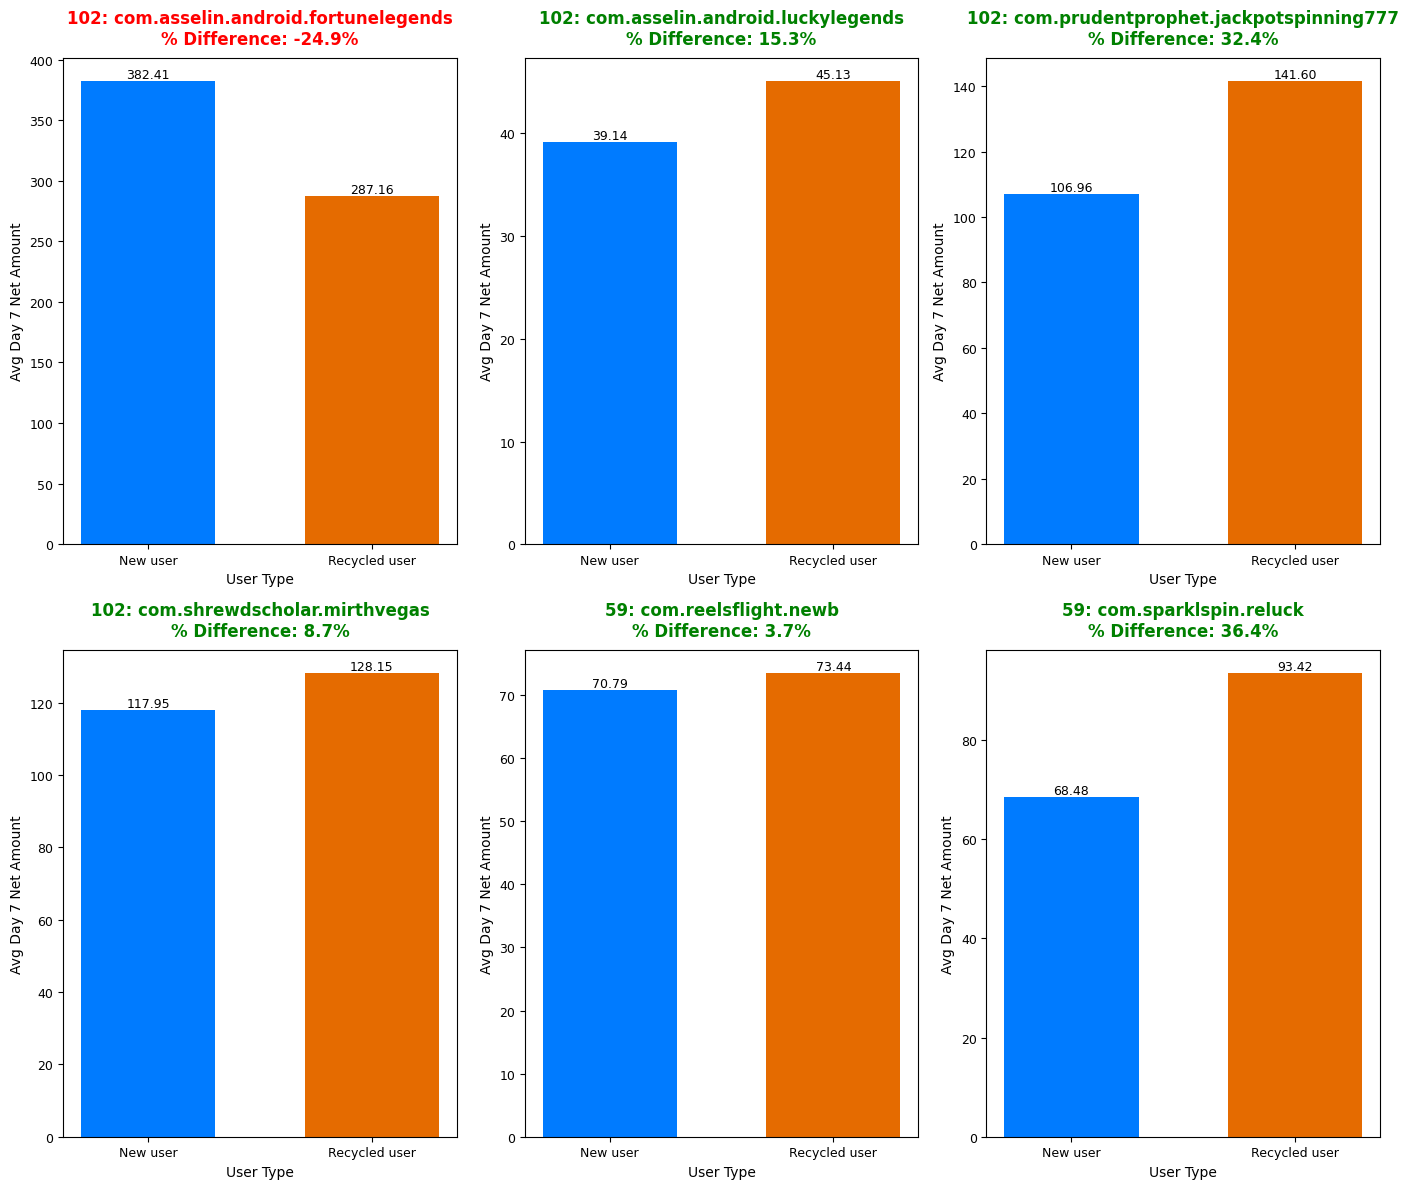

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
# https://chatgpt.com/share/6736edd3-6104-800e-8648-0ce4e4240d29

# Function to display DataFrame in Jupyter Notebook
def display_dataframe_to_user(name, dataframe):
    """
    Display a DataFrame in a user-friendly HTML format in Jupyter notebooks.
    
    Args:
        name (str): Title for the displayed DataFrame.
        dataframe (pd.DataFrame): The DataFrame to display.
    """
    style = """
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 1em;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
            font-weight: bold;
        }
    </style>
    """
    display(HTML(f"{style}<h3>{name}</h3>"))
    display(dataframe)

# Load your dataset
file_path = 'C:/Users/Win11/Downloads/20241115_060823_50567_v56n5.csv' #http://td.winnerstudio.vip:8996/#/tga/ide/59_32514
data = pd.read_csv(file_path)

# Data Processing
# 1. Filter for users with day_7_net_amount_sum > 0
filtered_data = data[data['day_7_net_amount_sum'] > 0]

# 2. Identify the top 6 games with the greatest number of users
top_games = (
    filtered_data['game']
    .value_counts()
    .head(6)
    .index
)

# 3. Filter the dataset to include only these top games
top_games_data = filtered_data[filtered_data['game'].isin(top_games)]

# 4. Add a 'Treatment' column based on nth_game
top_games_data['Treatment'] = top_games_data['nth_game'].apply(
    lambda x: 'Recycled user' if x > 1 else 'New user'
)

# 5. Calculate the average day_7_net_amount_sum for each game and treatment
grouped_data = (
    top_games_data.groupby(['game', 'Treatment'])
    .agg({'day_7_net_amount_sum': 'mean'})
    .reset_index()
)

# 6. Ensure games are sorted by their occurrence count for consistency
grouped_data['game'] = pd.Categorical(
    grouped_data['game'],
    categories=top_games,
    ordered=True
)

# Display the grouped DataFrame
display_dataframe_to_user(name="Grouped Data for Visualization", dataframe=grouped_data)

# Visualization
unique_games = grouped_data['game'].unique()
num_games = len(unique_games)
cols = int(np.ceil(np.sqrt(num_games)))  # Number of columns for a square-like layout
rows = int(np.ceil(num_games / cols))   # Rows based on the number of columns

plt.figure(figsize=(14, 12))

for i, game in enumerate(unique_games, start=1):
    subset = grouped_data[grouped_data['game'] == game]
    
    # Extract New user and Recycled user values
    new_user_value = subset[subset['Treatment'] == 'New user']['day_7_net_amount_sum'].values[0]
    recycled_user_value = subset[subset['Treatment'] == 'Recycled user']['day_7_net_amount_sum'].values[0]
    
    # Calculate percentage difference
    percentage_diff = ((recycled_user_value - new_user_value) / new_user_value) * 100
    
    # Set up subplot
    plt.subplot(rows, cols, i)
    bars = plt.bar(subset['Treatment'], subset['day_7_net_amount_sum'], color=['#007bff', '#e56b00'], width=0.6)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    # Title with percentage difference
    diff_color = 'green' if percentage_diff > 0 else 'red'
    plt.title(
        f'{game}\n% Difference: {percentage_diff:.1f}%', 
        fontsize=12, weight='bold', pad=10, color=diff_color
    )
    
    # Axes labels
    plt.xlabel('User Type', fontsize=10)
    plt.ylabel('Avg Day 7 Net Amount', fontsize=10)
    
    # Format ticks
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(False)

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [6]:
import pickle
import requests
from urllib.parse import urlencode
from sklearn.preprocessing import LabelEncoder
import json

In [7]:
bs_token = 'lWYPGrEyZ0xqY7CJGTMx3DP60VBxZ21v7yrHjKguyGtQY2C5z16og6N8zu0R4Mbw'
host = 'td.winnerstudio.vip'

def pull_data(sql_script, bs_token, host):
    data = {
        'token':          bs_token,
        'format':         'json_object',
        'timeoutSeconds': 2000,
        'sql':            sql_script
    }
    data = str(urlencode(data))
    response = requests.post(f'http://{host}:8992/querySql?{data}', timeout = 1000000)
    # Sample list of JSON strings
    json_list = response.text.split('\n')[1:]
    # Convert JSON strings to dictionaries
    dict_list = []
    for json_str in json_list:
        try:
            dict_list.append(json.loads(json_str))
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
    # Create a pandas DataFrame
    data = pd.DataFrame(dict_list).sort_index(axis = 1)
    return data


In [74]:
# So, you need to investigate how to increase the number of users across your platform. You need to understand the relevant parameters that will increase the performance of your game 
day = 7
version = 1

final_query = f"""
with acorn_all as (
select 
     game,users."#account_id",email,"register_time"
     ,sum(if(date_diff('day',"register_time","#event_time")<=1,cast("net_amount" as double),0.0))  as day_1_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=3,cast("net_amount" as double),0.0))  as day_3_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=7,cast("net_amount" as double),0.0))  as day_7_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=14,cast("net_amount" as double),0.0)) as day_14_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=14,cast("net_amount" as double),0.0)) as day_30_net_amount_sum
from
    (select "#account_id", "#event_time", "net_amount"
      from ta.v_event_102 
      where "$part_event"='order_pay' and "$part_date" between '2024-06-03' and '2024-10-13'
    ) as payments
  right join
    (select 
        email,"#account_id","register_time", 
        concat('102: ', bundle_id) as game
      from ta.v_user_102
      where cast("register_time" as varchar) between '2024-06-03' and '2024-10-13'
    ) as users
  on payments."#account_id"=users."#account_id"
group by 1,2,3,4)

, output_aux as (
select *,rank() over (partition by email order by "register_time") as nth_game
from acorn_all
where email is not null)

select *
from output_aux
where nth_game <= 5
and day_7_net_amount_sum > 0
"""

print(final_query)


with acorn_all as (
select 
     game,users."#account_id",email,"register_time"
     ,sum(if(date_diff('day',"register_time","#event_time")<=1,cast("net_amount" as double),0.0))  as day_1_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=3,cast("net_amount" as double),0.0))  as day_3_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=7,cast("net_amount" as double),0.0))  as day_7_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=14,cast("net_amount" as double),0.0)) as day_14_net_amount_sum
     ,sum(if(date_diff('day',"register_time","#event_time")<=14,cast("net_amount" as double),0.0)) as day_30_net_amount_sum
from
    (select "#account_id", "#event_time", "net_amount"
      from ta.v_event_102 
      where "$part_event"='order_pay' and "$part_date" between '2024-06-03' and '2024-10-13'
    ) as payments
  right join
    (select 
        email,"#account_id","register_time", 
        concat('102: ', bundle_i

In [75]:
df = pull_data(final_query, bs_token, host)
df

Error parsing JSON: Unterminated string starting at: line 1 column 258 (char 257)


,#account_id,day_14_net_amount_sum,day_1_net_amount_sum,day_30_net_amount_sum,day_3_net_amount_sum,day_7_net_amount_sum,email,game,nth_game,register_time
0,40671289,723.8240,103.7300,723.8240,196.0600,345.0400,swaimjamie@gmail.com,102: com.asselin.android.luckylegends,3,2024-08-19 14:24:22.000
1,40640677,1881.8500,75.5500,1881.8500,75.5500,1192.9500,Jrsantos2325@gmail.com,102: com.shrewdscholar.mirthvegas,1,2024-08-15 18:39:11.000
2,40687666,997.2905,374.8905,997.2905,827.8905,875.1905,Jrsantos2325@gmail.com,102: com.prudentprophet.jackpotspinning777,2,2024-08-21 17:37:31.000
3,40919595,2.5610,0.0000,2.5610,0.0000,2.5610,swdiane2023@gmail.com,102: com.asselin.android.jackpotlegends,1,2024-09-25 16:20:14.000
4,40872074,189.3300,12.2600,189.3300,12.2600,78.6600,slbc420@gmail.com,102: com.asselin.android.wildlegends,1,2024-09-15 22:31:08.000
...,...,...,...,...,...,...,...,...,...,...
74732,40870903,483.8620,125.6190,483.8620,125.6190,209.3860,Maryu@nccusa.edu,102: com.asselin.android.jackpotlegends,2,2024-09-15 19:06:32.000
74733,40584492,90.4250,0.0000,90.4250,6.5700,44.7400,Redman500x@gmail.com,102: com.asselin.android.jackpotlegends,1,2024-08-05 18:13:16.000
74734,40742903,78.1900,10.5700,78.1900,10.5700,50.7100,Redman500x@gmail.com,102: com.wisdomwalk.samsung.winningroyale,2,2024-08-27 05:33:57.000
74735,40865769,16.3000,0.0000,16.3000,0.0000,2.6500,Rubberren80@gmail.com,102: com.shrewdscholar.mirthvegas,1,2024-09-15 01:23:27.000


In [79]:
time_columns = [
    'day_1_net_amount_sum',
    'day_3_net_amount_sum',
    'day_7_net_amount_sum',
    'day_14_net_amount_sum',
    'day_30_net_amount_sum'
]

top_9_games = (
    df['game']
    .value_counts()
    .head(9)
    .index
)

In [80]:
# Filter the dataset to include only these top games
top_games_data = df[df['game'].isin(top_9_games)]

# Add a 'Treatment' column based on nth_game
top_games_data['Treatment'] = top_games_data['nth_game'].apply(
    lambda x: 'Recycled user' if x > 1 else 'New user'
)

# Calculate the average for all time-based columns, grouped by game and treatment
grouped_data = (
    top_games_data.groupby(['game', 'Treatment'])[time_columns]
    .mean()
    .reset_index()
)

# Ensure games are sorted by their occurrence count for consistency
grouped_data['game'] = pd.Categorical(
    grouped_data['game'],
    categories=top_9_games,
    ordered=True
)


C:\Users\Win11\AppData\Local\Temp\ipykernel_22640\2495895464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_games_data['Treatment'] = top_games_data['nth_game'].apply(


I think this is what should be done

,game,Treatment,day_1_net_amount_sum,day_3_net_amount_sum,day_7_net_amount_sum,day_14_net_amount_sum,day_30_net_amount_sum
0,102: com.asselin.android.fortunelegends,New user,16.531892,26.423942,44.785443,70.754964,70.754964
1,102: com.asselin.android.fortunelegends,Recycled user,14.038063,24.305646,41.119719,70.878713,70.878713
2,102: com.asselin.android.jackpotlegends,New user,15.532156,25.228298,44.760345,69.816785,69.816785
3,102: com.asselin.android.jackpotlegends,Recycled user,14.668412,24.938087,46.415854,75.115233,75.115233
4,102: com.asselin.android.luckylegends,New user,14.165946,22.401476,38.535461,61.647454,61.647454
5,102: com.asselin.android.luckylegends,Recycled user,13.850699,25.208311,46.480027,72.164109,72.164109
6,102: com.asselin.android.wildlegends,New user,14.547262,22.583132,37.450087,59.019848,59.019848
7,102: com.asselin.android.wildlegends,Recycled user,15.160273,27.357334,50.733595,88.671821,88.671821
8,102: com.asselin.samsung.luckylegends,New user,24.195863,38.178803,64.566623,110.118343,110.118343
9,102: com.asselin.samsung.luckylegends,Recycled user,11.695528,18.874552,31.380454,54.595576,54.595576


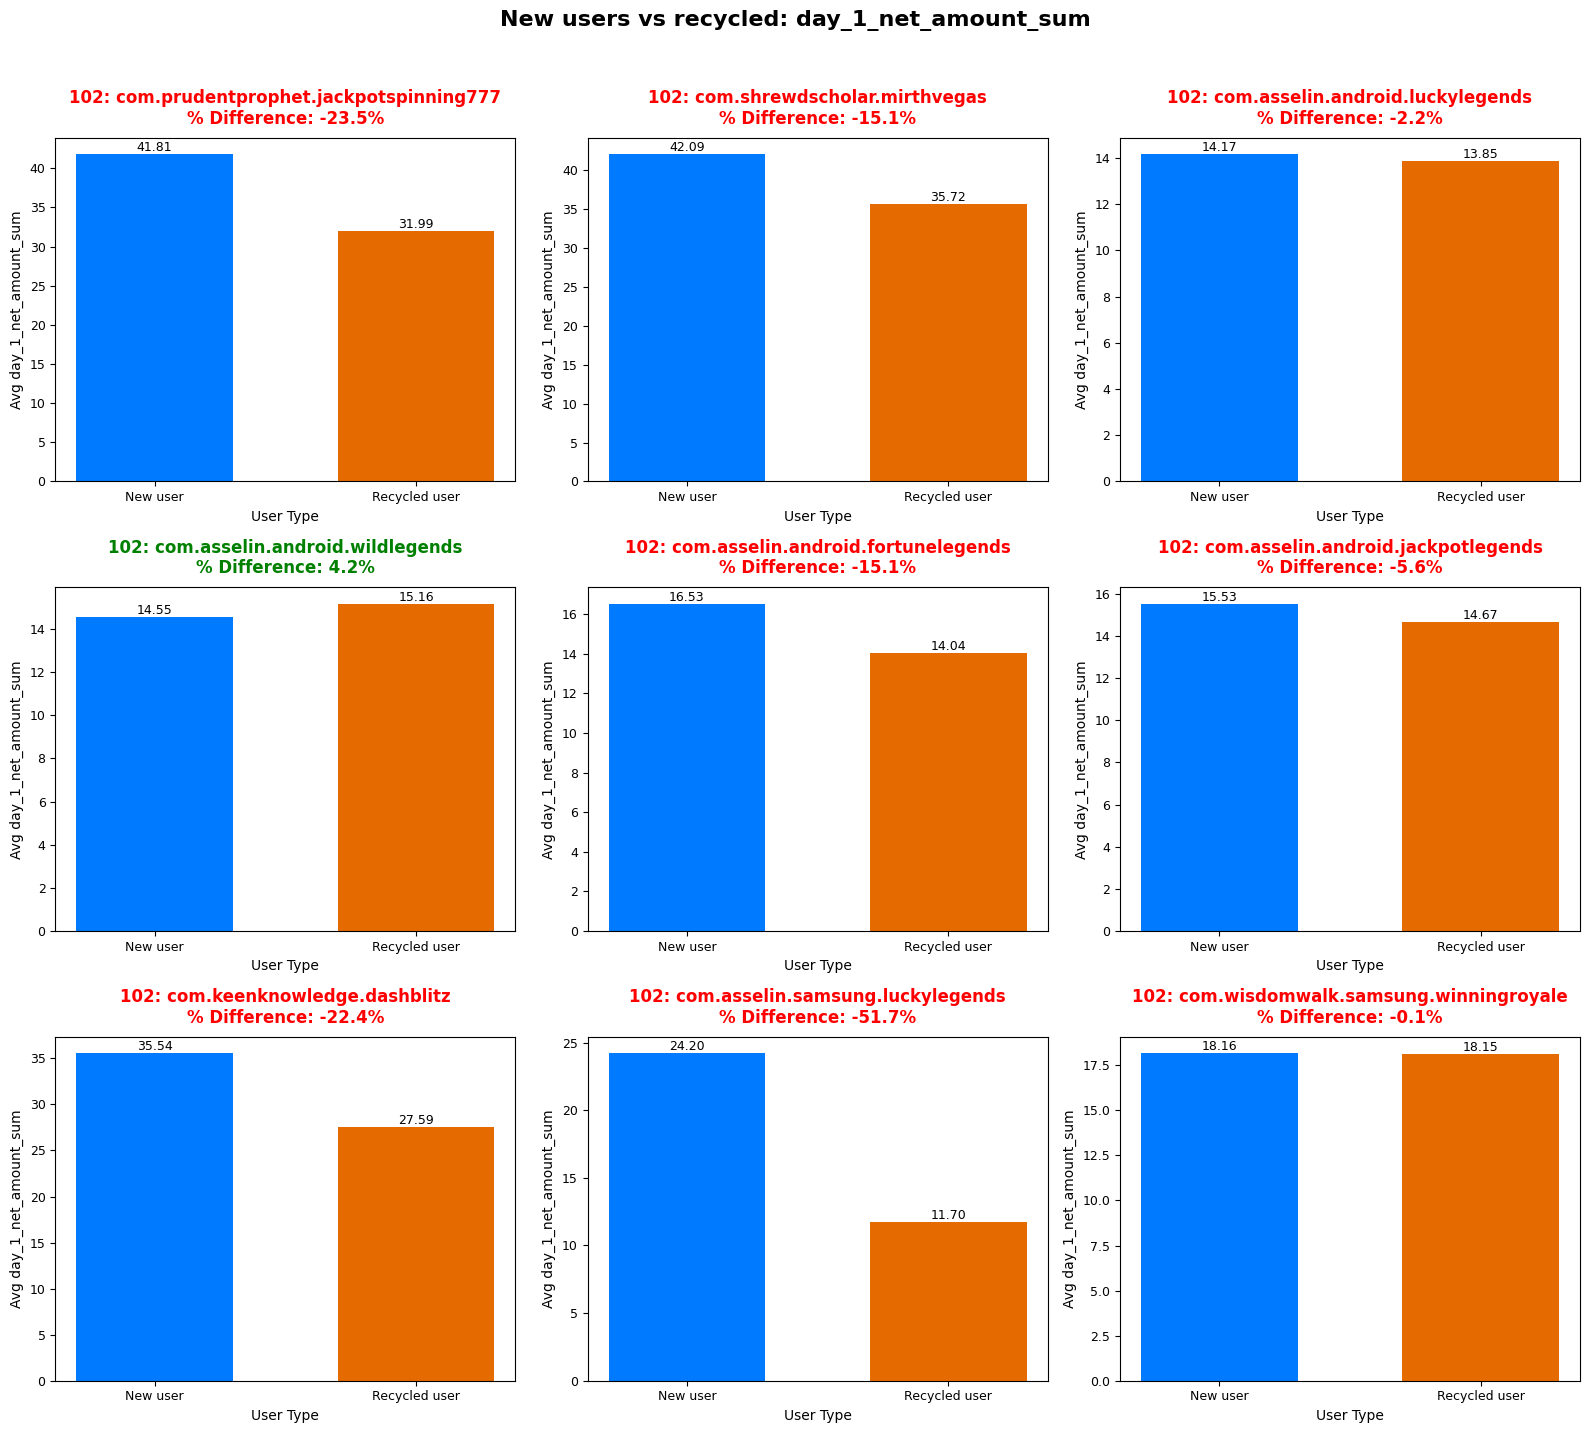

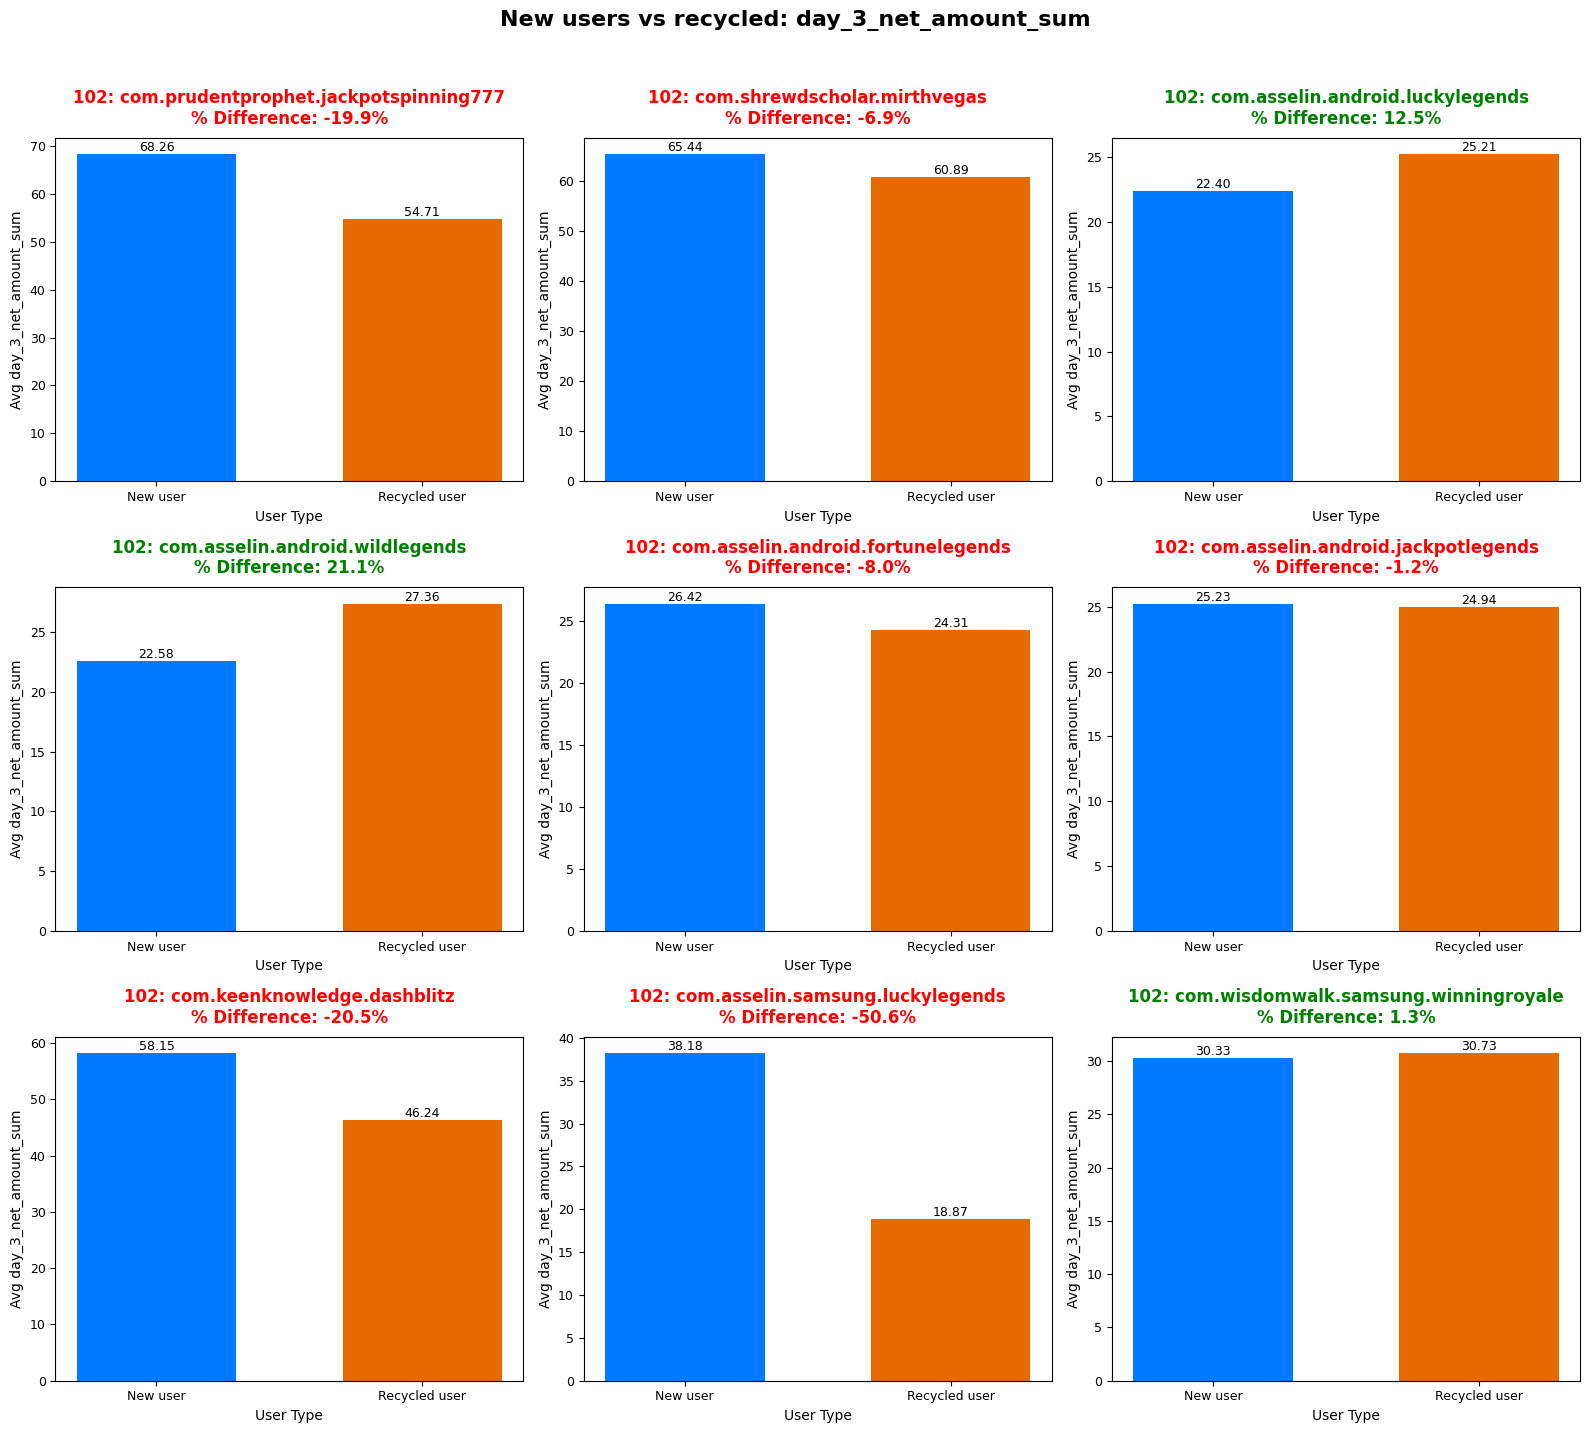

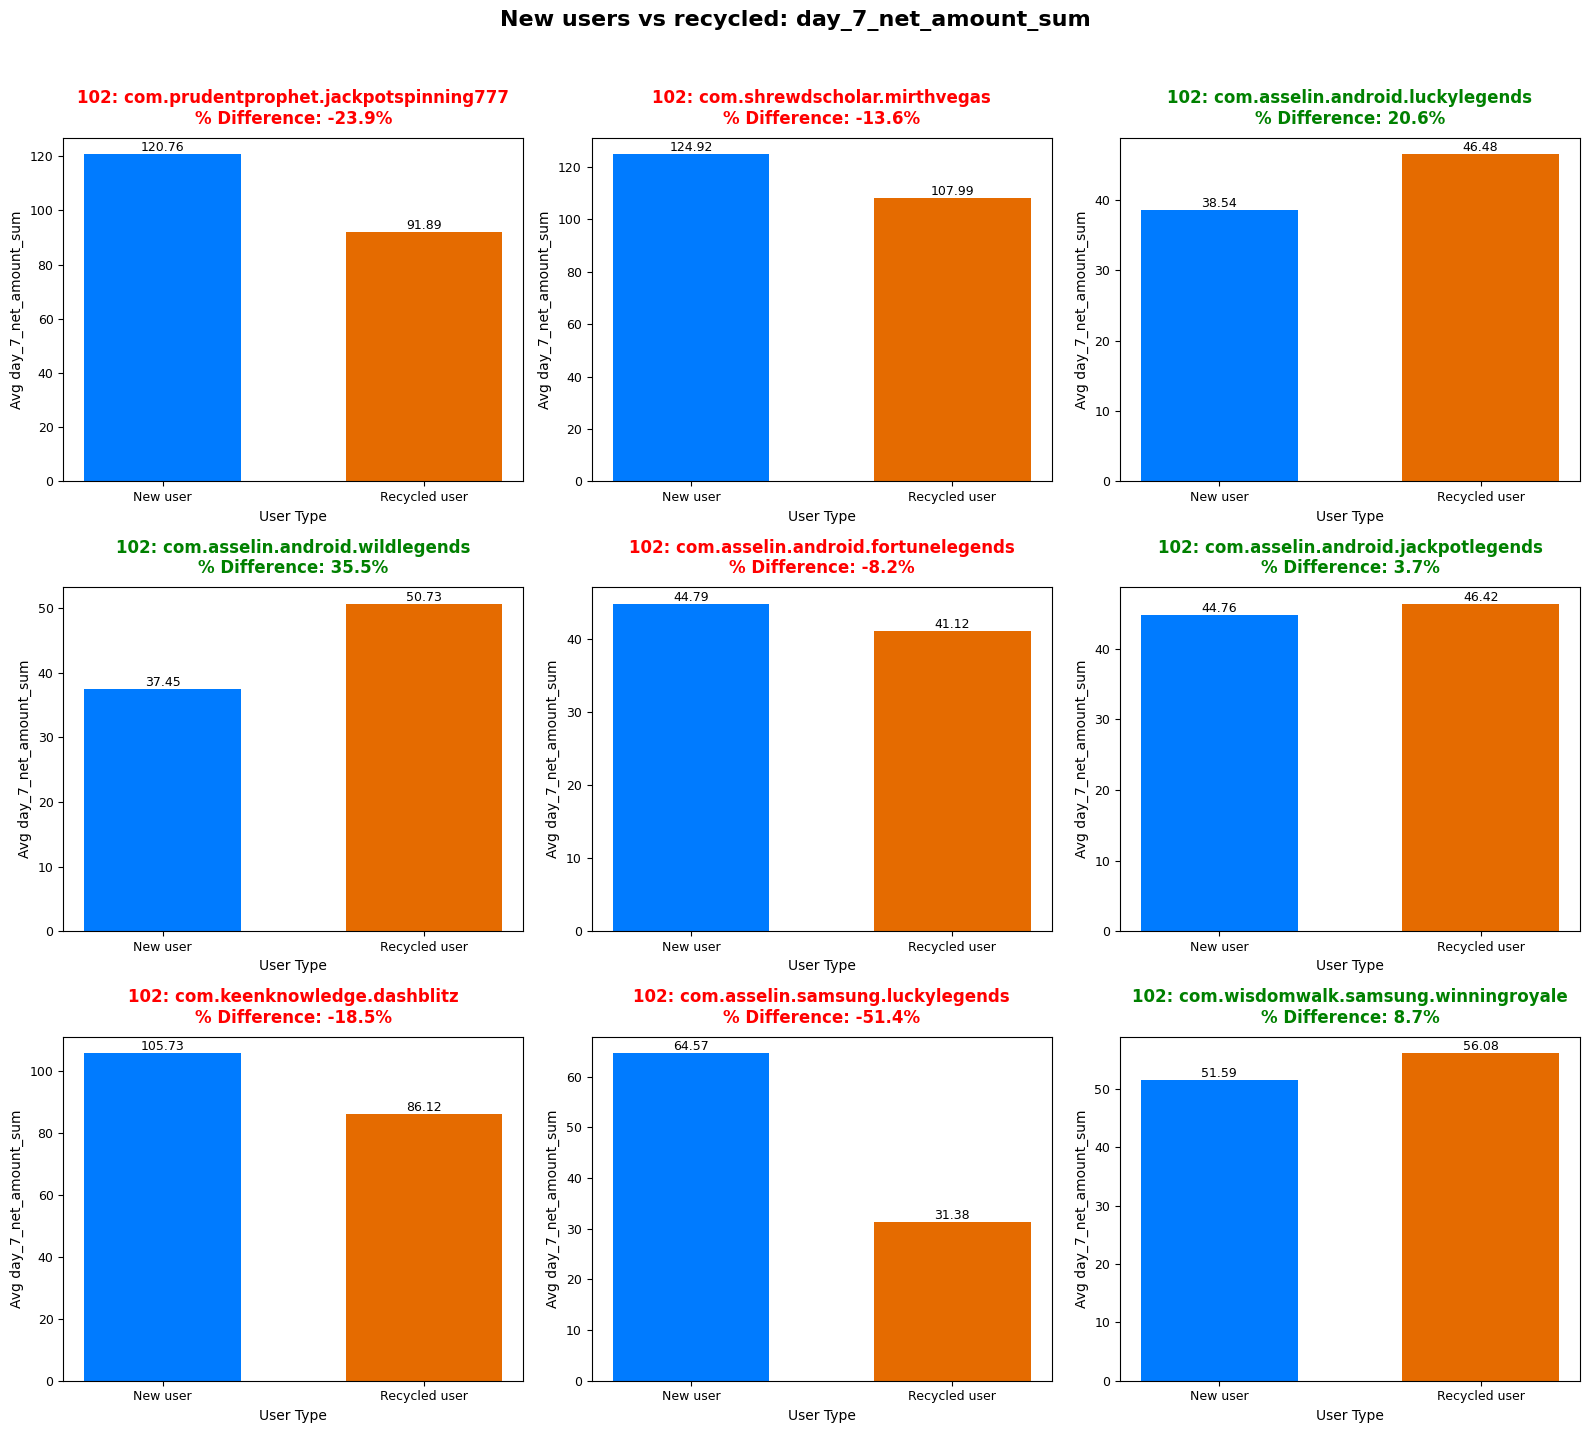

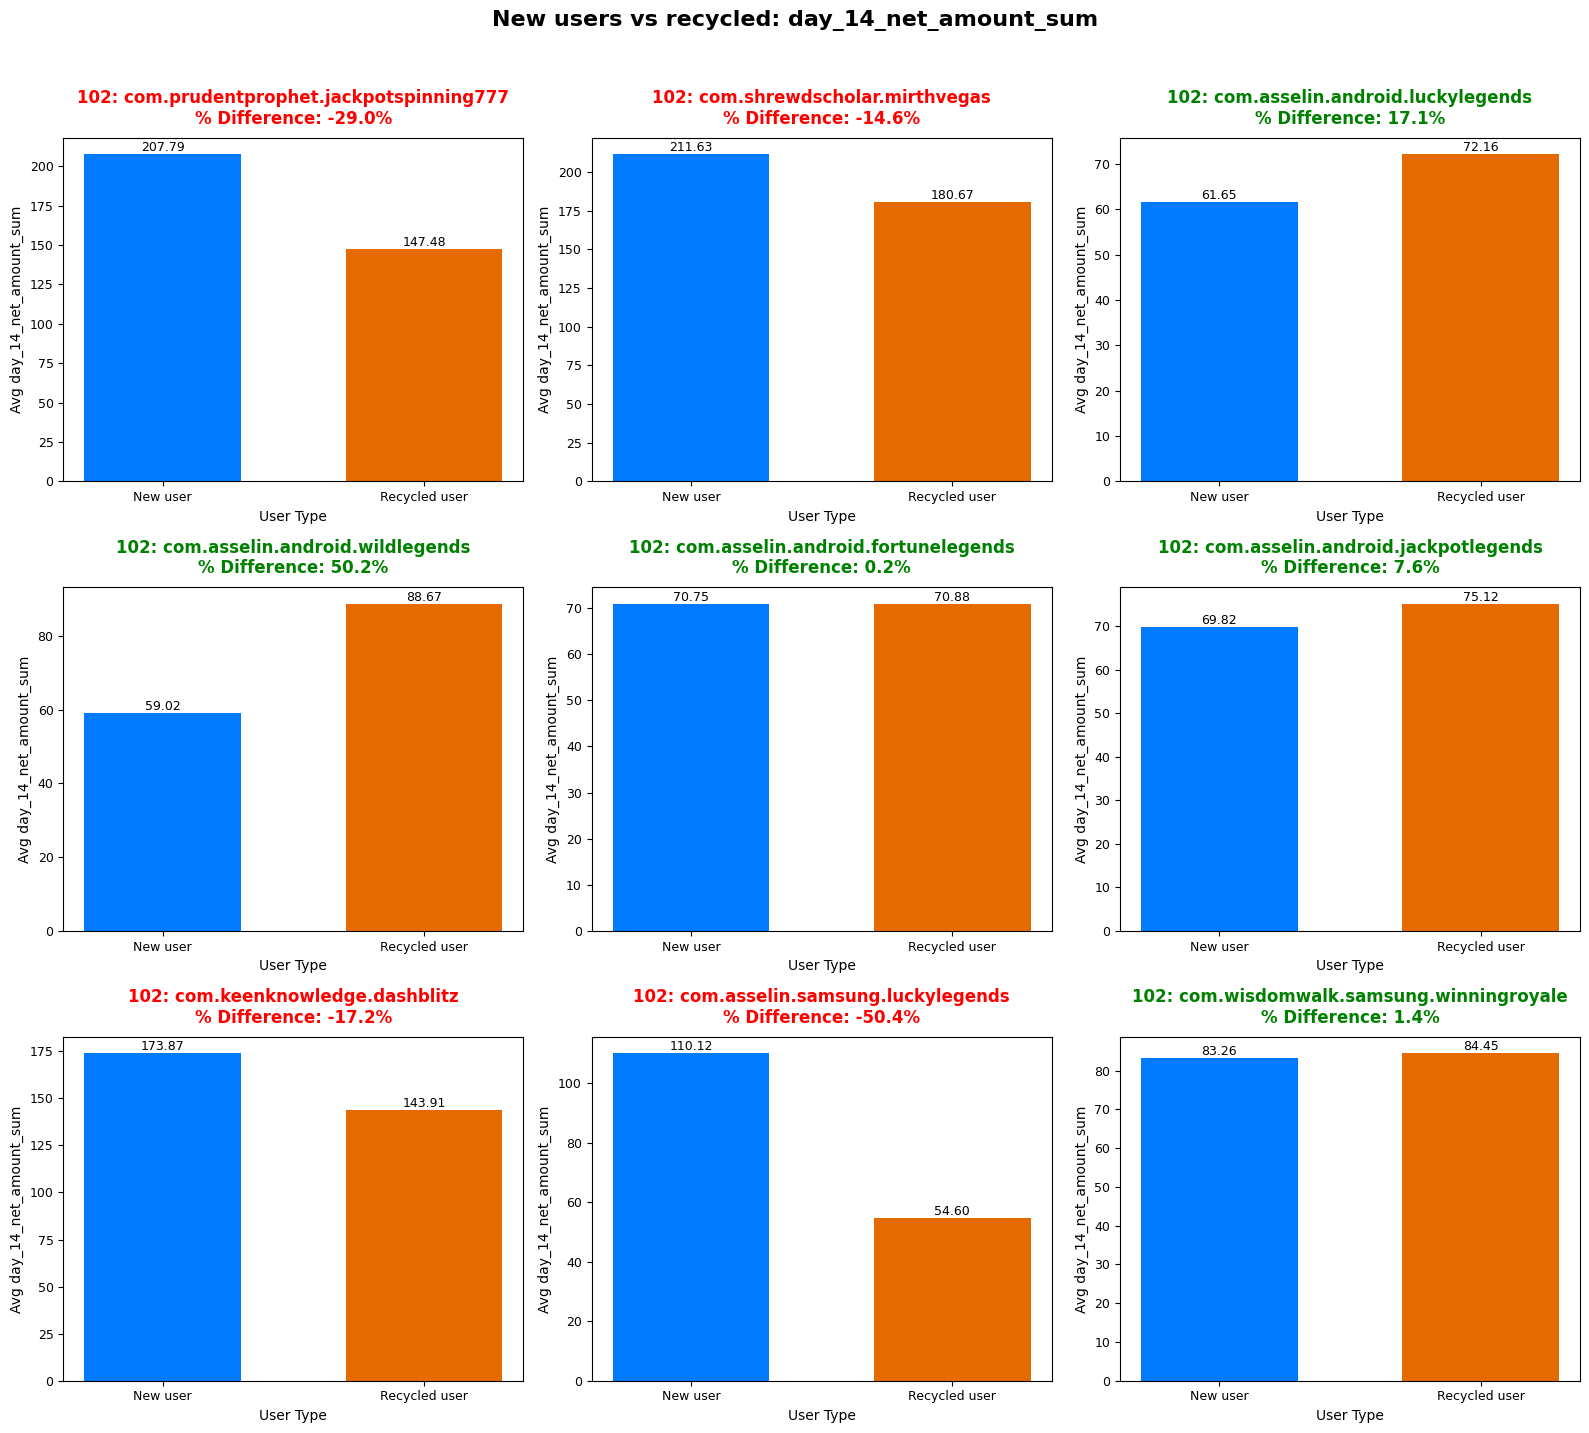

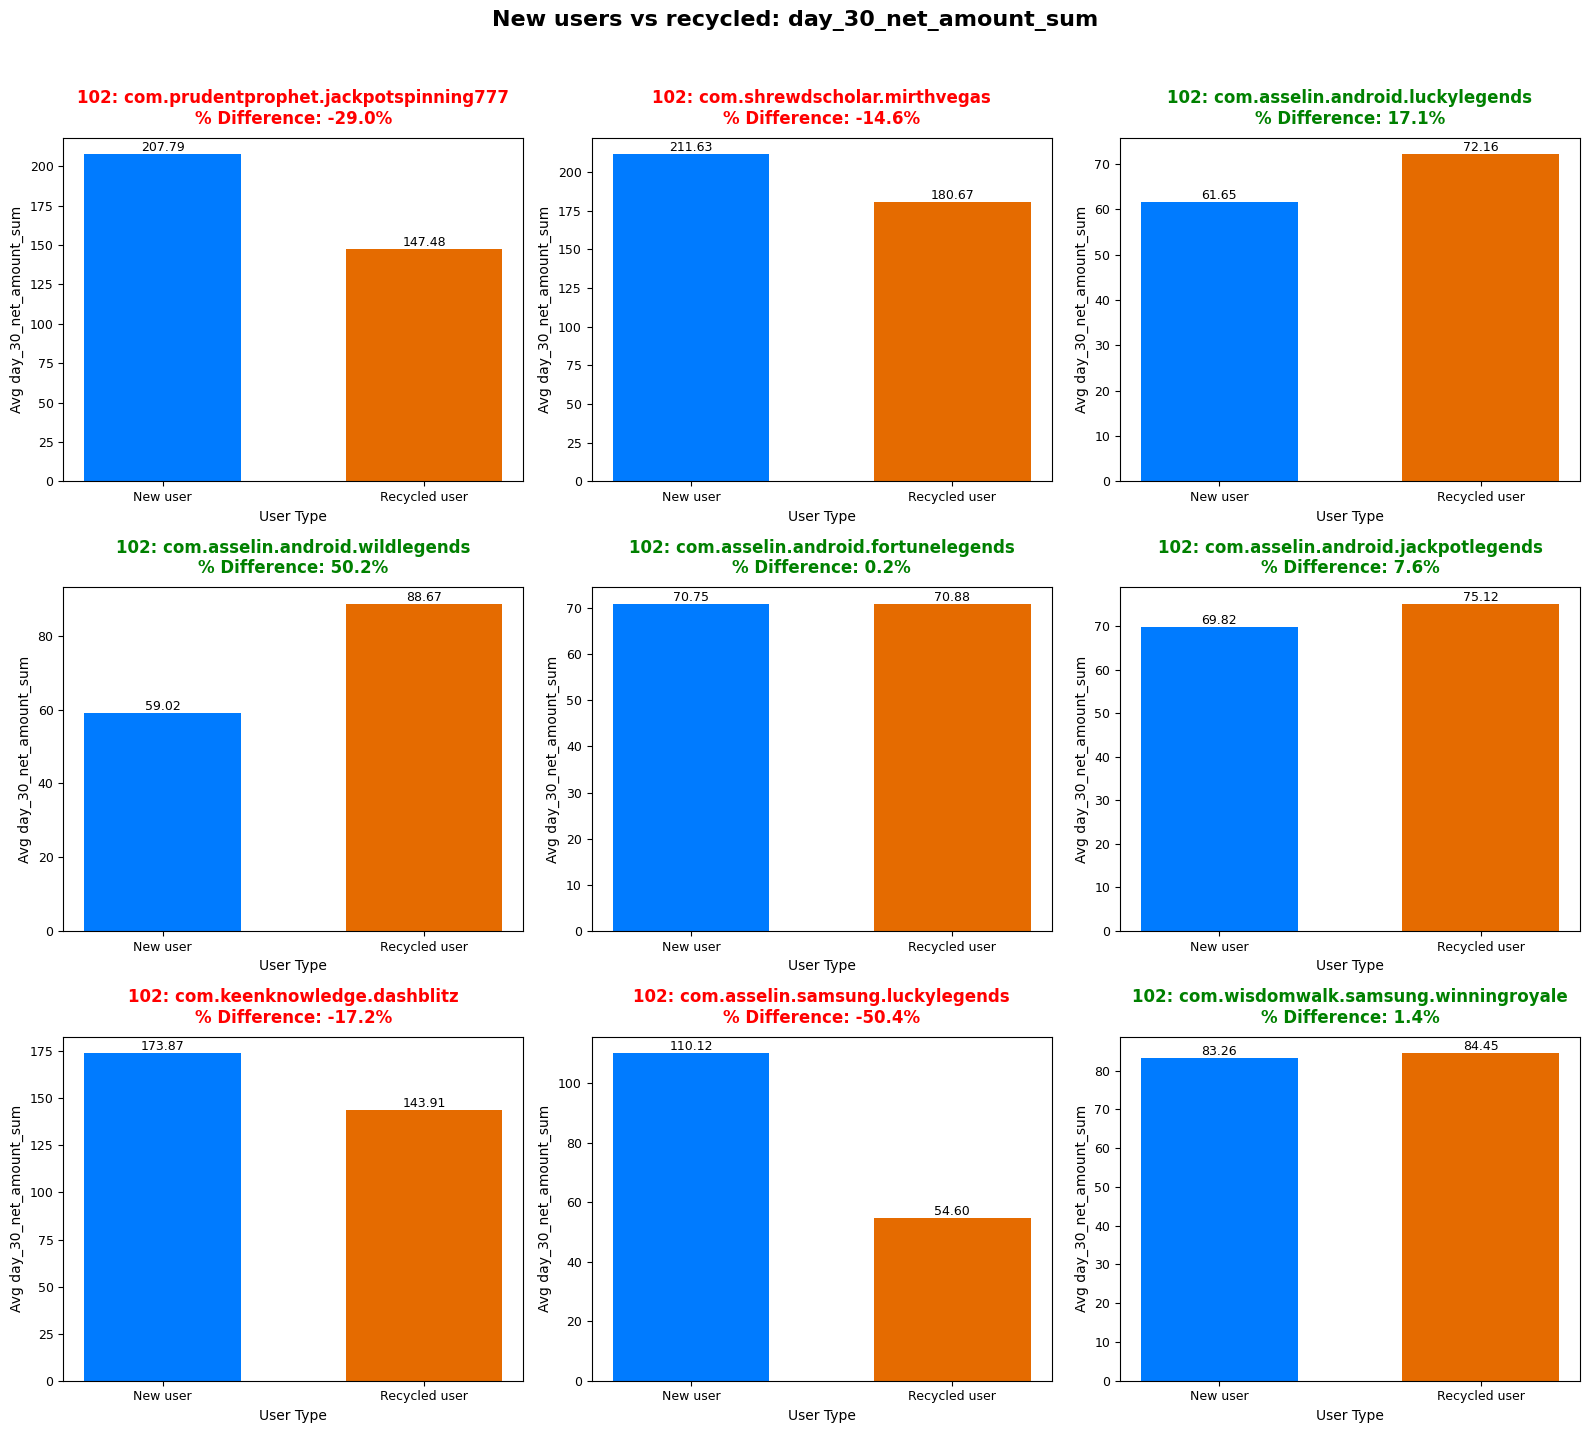

In [82]:
# Display the grouped DataFrame for review
display_dataframe_to_user(name="Grouped Data for Top 9 Games", dataframe=grouped_data)

# Plotting McKinsey-style charts for the new metrics
for col in time_columns:
    plt.figure(figsize=(16, 14))
    for i, game in enumerate(top_9_games, start=1):
        subset = grouped_data[grouped_data['game'] == game]
        
        # Extract New user and Recycled user values
        new_user_value = subset[subset['Treatment'] == 'New user'][col].values[0]
        recycled_user_value = subset[subset['Treatment'] == 'Recycled user'][col].values[0]
        
        # Calculate percentage difference
        percentage_diff = ((recycled_user_value - new_user_value) / new_user_value) * 100
        
        # Set up subplot
        plt.subplot(3, 3, i)
        bars = plt.bar(subset['Treatment'], subset[col], color=['#007bff', '#e56b00'], width=0.6)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        # Title with percentage difference
        diff_color = 'green' if percentage_diff > 0 else 'red'
        plt.title(
            f'{game}\n% Difference: {percentage_diff:.1f}%', 
            fontsize=12, weight='bold', pad=10, color=diff_color
        )
        
        # Axes labels
        plt.xlabel('User Type', fontsize=10)
        plt.ylabel(f'Avg {col}', fontsize=10)
        
        # Format ticks
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=9)
        plt.grid(False)

    # Adjust layout for each metric
    plt.suptitle(f'New users vs recycled: {col}', fontsize=16, weight='bold', y=1.02)
    plt.tight_layout()
    plt.show()